# import the necessary libraries and read the data using pandas

In [92]:
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv('C:/Users/91977/Desktop/Big Mart Sales/Train.csv')
data1=pd.read_csv('C:/Users/91977/Desktop/Big Mart Sales/Train.csv')

print('THE SHAPE OF TRAINING DATA IS',data.shape)

THE SHAPE OF TRAINING DATA IS (8523, 12)


# lets explore training data

In [93]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [94]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [95]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117F25B0>,
      dtype=object)

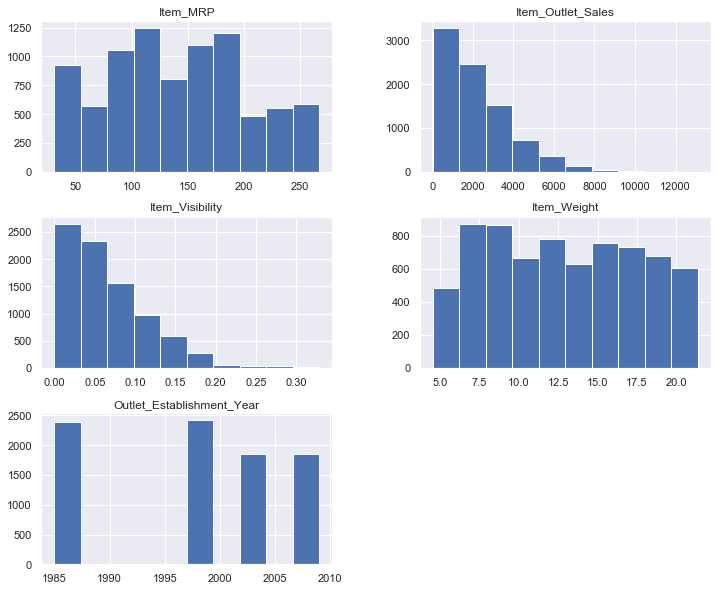

In [96]:
data.hist(figsize=(12,10))

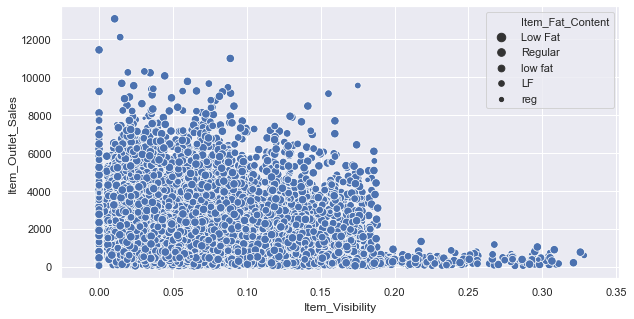

In [97]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',size='Item_Fat_Content',data=data)

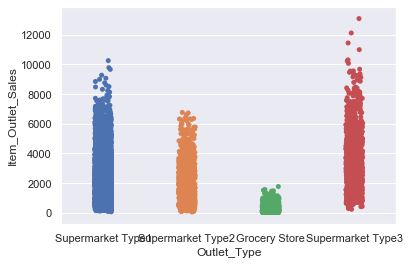

In [98]:
sns.stripplot(x='Outlet_Type',y='Item_Outlet_Sales',data=data)

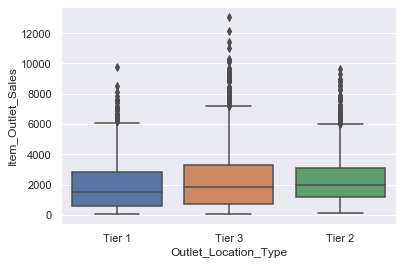

In [99]:
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=data)

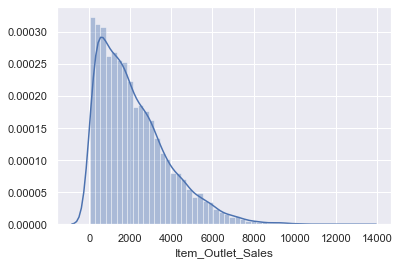

In [100]:
sns.distplot(data['Item_Outlet_Sales'],hist=True)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 566.0+ KB


# finding the missing values

# item_weight and outlet_size contains missing values

In [102]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# treating the missing values

In [103]:
for i in data['Item_Type'].unique():
    li = list(data[(data['Item_Weight'].isnull()) & (data['Item_Type'] == i)].index)
    data['Item_Weight'][li] = data['Item_Weight'][data['Item_Type'] == i].mean()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [104]:
data.isnull().sum()
#no missing values in item_wight

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# lets check the correlation between the target and the features(other columns).

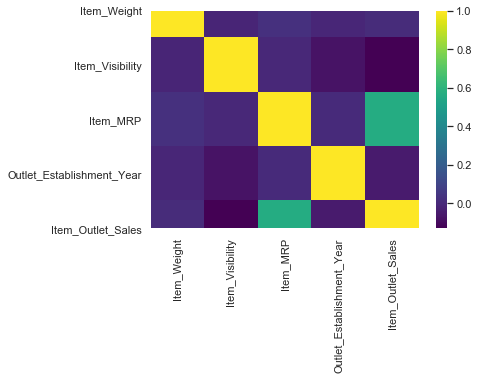

In [105]:
sns.heatmap(data.corr(),cmap=('viridis'))
#graphically

In [106]:
corr_matrix=data.corr()
corr_matrix['Item_Outlet_Sales']

Item_Weight                  0.012088
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

# so from above results, except Item_MRP all the other features are not that much correlated with the target

# we are dropping outlet_size 

In [107]:
data.drop('Outlet_Size',axis=1,inplace=True)

# checking outliers in continous columns

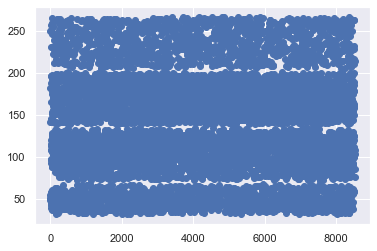

In [108]:
import matplotlib.pyplot as plt
plt.scatter(data['Item_MRP'].index,data['Item_MRP'])

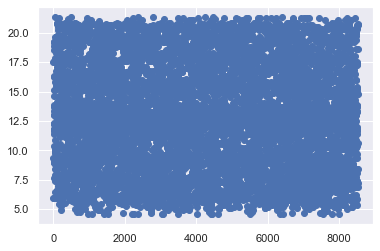

In [109]:
plt.scatter(data['Item_Weight'].index,data['Item_Weight'])

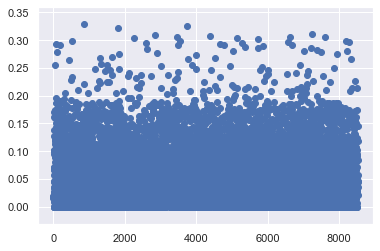

In [110]:
plt.scatter(data['Item_Visibility'].index,data['Item_Visibility'])

In [111]:
from scipy import stats
li=list(data['Item_Visibility'][np.abs(stats.zscore(data['Item_Visibility']))>4].index)
li

[83,
 108,
 174,
 521,
 854,
 1805,
 1841,
 2251,
 2586,
 2613,
 2855,
 2895,
 3474,
 3488,
 3540,
 3750,
 4006,
 4382,
 4674,
 4789,
 5031,
 5150,
 5287,
 5374,
 5732,
 5734,
 5880,
 6576,
 6622,
 6674,
 7005,
 7215,
 7250,
 7388,
 7499,
 7603,
 7949,
 8194,
 8215,
 8273]

In [112]:
data['Item_Visibility'][li]=data.drop(li)['Item_Visibility'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# checking the outliers have been treated or not

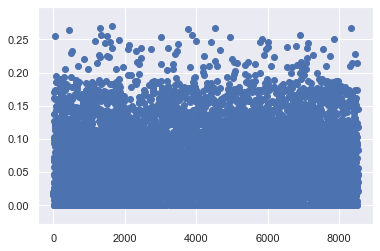

In [113]:
plt.scatter(data['Item_Visibility'].index,data['Item_Visibility'])

In [114]:
 data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

# this label encoder is used to convert the string into numbers but alphabatically.

In [115]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
#alphabetically

for i in data.columns:
    if isinstance(data[i][0], str):
            data[i] = encoder.fit_transform(data[i])
data.head(2)           


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,2,2,443.4228


# splitting the data into two parts

In [116]:
#splitting data, inputs and output
X=data.drop('Item_Outlet_Sales',axis=1)
y=data['Item_Outlet_Sales']


 mu = 2181.288913575032 and sigma = 1706.3995013565955 



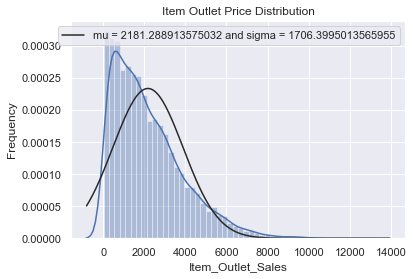

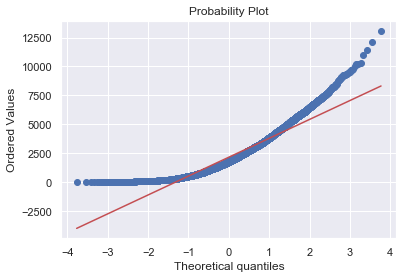

In [117]:
# using log to remove the skewness of output
from scipy import stats
from scipy.stats import norm, skew
sns.distplot(data['Item_Outlet_Sales'], fit = norm);

#GET THE FITTED PARAMETERS USED BY THE FUNCTION
(mu,sigma) = norm.fit(data['Item_Outlet_Sales'])
print(f'\n mu = {mu} and sigma = {sigma} \n')

#NOW PLOT THE DISTRIBUTION 
plt.legend([f'mu = {mu} and sigma = {sigma}'], loc= 'best')
plt.ylabel('Frequency')
plt.title('Item Outlet Price Distribution')

#GET ALSO THE QQ-PLOT
fig=plt.figure()
res=stats.probplot(data['Item_Outlet_Sales'], plot=plt)
plt.show()      


In [118]:
#USIONG LOG TO REMOVE THE SKEWNESS OF TARGET
data['Item_Outlet_Sales']=np.log(data['Item_Outlet_Sales'])

In [119]:
X.drop(['Item_Fat_Content','Outlet_Location_Type'],axis=1,inplace=True)

# checking multicollinearity (VIF) in inputs

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X_vif = add_constant(X)
pd.Series([variance_inflation_factor(X_vif.values,i) for i in range(X_vif.shape[1])], index=X_vif.columns)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                        58763.252222
Item_Identifier                  1.004403
Item_Weight                      1.004856
Item_Visibility                  1.036010
Item_Type                        1.003899
Item_MRP                         1.001869
Outlet_Identifier                1.023570
Outlet_Establishment_Year        1.029533
Outlet_Type                      1.051455
dtype: float64

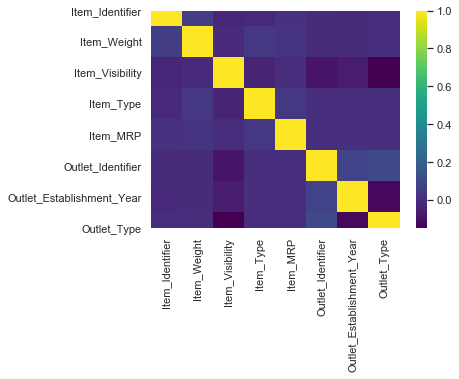

In [121]:
corr=X.corr()
sns.heatmap(corr, square=True,cmap='viridis')

# # checking relationship of each column(CONTINOUS) with an output by using ANOVA

In [122]:
X.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Type'],
      dtype='object')

# now, we will check significancy of categorical variables with the target(continous) by using ANOVA

# dropping the continous variables and rest storing in the variable named : column

In [123]:
column=X.columns
column=column.drop(['Item_Weight','Item_Visibility','Item_MRP'])
pd.Series([stats.f_oneway(X[i],y)for i in column],index=column)

Item_Identifier                                (25198.3824803495, 0.0)
Item_Type                    (2.2174040565749613, 0.13648084451126813)
Outlet_Identifier                             (6217.408876306685, 0.0)
Outlet_Establishment_Year                    (474826705.16086763, 0.0)
Outlet_Type                                  (189743.33649906804, 0.0)
dtype: object

# now checking relationship between CONTINOUS input with an output bu sing CORRELATION COEFFICIENT

In [124]:
colm = ['Item_Weight','Item_Visibility','Item_MRP']
pd.Series([np.abs(X[i].corr(y)) for i in colm], index = colm)

Item_Weight        0.007835
Item_Visibility    0.169401
Item_MRP           0.509671
dtype: float64

# making function to check the degree of each column and will help to assign the effective degree to the inputs

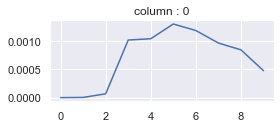

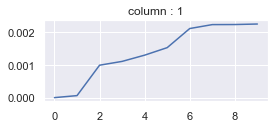

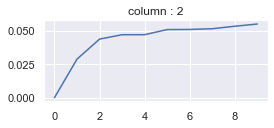

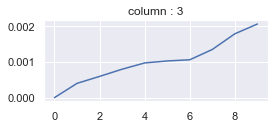

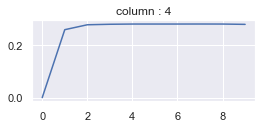

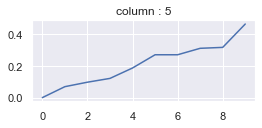

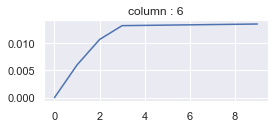

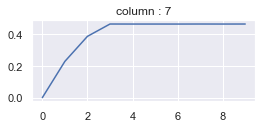

In [125]:
import numpy as np
from sklearn.linear_model import LinearRegression
def check_exp(inp,degree,out):
    
    poly = PolynomialFeatures(degree = degree) 
    X_poly = poly.fit_transform(inp) 


    lin2 = LinearRegression()
    lin2.fit(X_poly, out)
    
    return lin2.score(X_poly, out)

for a in range(X.shape[1]):
    acc= []
    for i in range(10):
        acc.append(check_exp(X.iloc[:,a].values.reshape(-1,1), i, y))

    import matplotlib.pyplot as plt
    #plt.figure(figsize=(4,X.shape[1]*2))#LENGTH AND BREADTH
    plt.figure(figsize=(4,14))
    
    plt.subplot(X.shape[1],1,a+1)
    plt.title('column : '+str(a))
    plt.plot(acc)
 


# listing degree of columns in the variable names L and transform. 

# A FUNCTION WHICH COMBINES ALL THE TRANSFORMATION.

In [126]:
l=[4,2,3,1,2,3,3]
from sklearn.preprocessing import PolynomialFeatures
#from 1 to [1]+1 is for i, L is for j
for i,j in zip(range(1,X.shape[1]+1),l):
    exec(f'poly{i} = PolynomialFeatures(degree = {j})')
    exec(f'X_{i} = poly{i}.fit_transform(X.iloc[:,{i}-1].values.reshape(-1,1))')

# BELOW  IS THE MANAUL CODE WHICH WE TRANSFORM INTO ABOVE FUNCTION.

In [127]:
#poly=PolynomialFeatures(degree=1)
#X_poly=poly.fit_transform(X.iloc[:,0].values.reshape(-1,1))

In [128]:
#poly=PolynomialFeatures(degree=2)
#X_poly1=poly.fit_transform(X.iloc[:,1].values.reshape(-1,1))

In [129]:
#poly=PolynomialFeatures(degree=2)
#X_poly2=poly.fit_transform(X.iloc[:,2].values.reshape(-1,1))

In [130]:
#poly=PolynomialFeatures(degree=2)
#X_poly3=poly.fit_transform(X.iloc[:,3].values.reshape(-1,1))

In [131]:
#poly=PolynomialFeatures(degree=2)
#X_poly4=poly.fit_transform(X.iloc[:,4].values.reshape(-1,1))

In [132]:
#poly=PolynomialFeatures(degree=1)
#X_poly5=poly.fit_transform(X.iloc[:,5].values.reshape(-1,1))

In [133]:
#poly=PolynomialFeatures(degree=3)
#X_poly6=poly.fit_transform(X.iloc[:,6].values.reshape(-1,1))

In [134]:
#poly=PolynomialFeatures(degree=3)
#X_poly7=poly.fit_transform(X.iloc[:,7].values.reshape(-1,1))

In [135]:
#poly=PolynomialFeatures(degree=2)
#X_poly8=poly.fit_transform(X.iloc[:,8].values.reshape(-1,1))

In [136]:
#poly=PolynomialFeatures(degree=2)
#X_poly9=poly.fit_transform(X.iloc[:,9].values.reshape(-1,1))

# NOW CONCATENATE ALL THE TRANSFORMED INPUTS IN X

In [137]:
#x=np.concatenate([X_poly,X_poly1,X_poly2,X_poly3,X_poly4,X_poly5,X_poly6,X_poly7,X_poly8,X_poly9],axis=1)
x=np.concatenate((X_1,X_2,X_3,X_4,X_5,X_6,X_7),axis=1)

# LINEAR REGRESSION

In [138]:
from sklearn import linear_model
lm = linear_model.LinearRegression()

In [139]:
x.shape

(8523, 25)

In [140]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, test_size=.3, random_state =3)

In [141]:
lm.fit(train_x,train_y)
lm.score(train_x,train_y)*100

42.675550251845344

In [142]:
lm.score(test_x,test_y)*100

44.609095629915565

In [143]:
test_x.shape

(2557, 25)

# POLYNOMIAL REGRESSION

In [144]:
prm=LinearRegression()

In [145]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, test_size=.3, random_state =3)

In [146]:
lm.fit(train_x,train_y)
lm.score(train_x,train_y)*100

42.67555025196225

In [147]:
lm.score(test_x,test_y)*100

44.60909547699052

# RANDOM FOREST

In [148]:
from random import seed
from random import randrange
from csv import reader
from math import sqrt

In [149]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=200,max_depth=5)

In [150]:
train_X,test_X,train_y,test_y = train_test_split(X,y,random_state=2, test_size=.3)

In [151]:
rfr.fit(train_X,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [152]:
rfr.score(train_X,train_y)*100

74.48858995782098

In [153]:
rfr.score(test_X,test_y)*100

74.05618803982907

# assign all data to predict actual o/t

In [154]:
rfr.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

# reading the testing data

In [155]:
test_data=pd.read_csv('C:/Users/91977/Desktop/Big Mart Sales/Test.csv')
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


# checking the missing values in the data

In [156]:
#treating missing values
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

# replacing the MISSING values with the mean of filled values in ITEM_WEIGHT

In [157]:
for i in test_data['Item_Type'].unique():
    li = list(test_data[(test_data['Item_Weight'].isnull()) & (test_data['Item_Type'] == i)].index)
    test_data['Item_Weight'][li] = test_data['Item_Weight'][test_data['Item_Type'] == i].mean()
    

test_data.drop(['Item_Fat_Content','Outlet_Location_Type','Outlet_Size'],axis=1,inplace=True)  

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# LABEL ENCODER IS USED TO CONVERT THE DATA INTO NUMERICAL FORMAT

In [158]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
#alphabetically

for i in test_data.columns:
    if isinstance(test_data[i][0], str):
            test_data[i] = encoder.fit_transform(test_data[i])


In [159]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type
0,1103,20.75000,0.007565,13,107.8622,9,1999,1
1,1067,8.30000,0.038428,4,87.3198,2,2007,1
2,1406,14.60000,0.099575,11,241.7538,0,1998,0
3,809,7.31500,0.015388,13,155.0340,2,2007,1
4,1184,12.95504,0.118599,4,234.2300,5,1985,3


# using RANDOM FOREST making predictions

In [160]:
pred=rfr.predict(test_data)

# storing the exponential y(output) in variable called pre

In [161]:
# we convert this into exp bcz we change y in log y
pre=np.exp(pred)

In [162]:
import pandas as pd
output=pd.DataFrame(pre,columns=['Item_Outlet_Sales'])
output

,Item_Outlet_Sales
0,1445.885844
1,1217.273529
2,490.541494
3,2243.863081
4,5440.707154
...,...
5676,1857.934872
5677,2494.281062
5678,1709.398365
5679,3144.046828


In [163]:
for i in column:
    print(data1.groupby(i).mean()['Item_Outlet_Sales'])

Item_Identifier
DRA12    1843.600200
DRA24    2246.218971
DRA59    2614.430150
DRB01    1518.024000
DRB13    2428.838400
            ...     
NCZ30    1807.647000
NCZ41    1827.487840
NCZ42    3839.801760
NCZ53    3014.742400
NCZ54    3249.104000
Name: Item_Outlet_Sales, Length: 1559, dtype: float64
Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64
Outlet_Identifier
OUT010     339.351662
OUT013    2298.99

# now we will check the categorical columns that gives highest sales in the data.

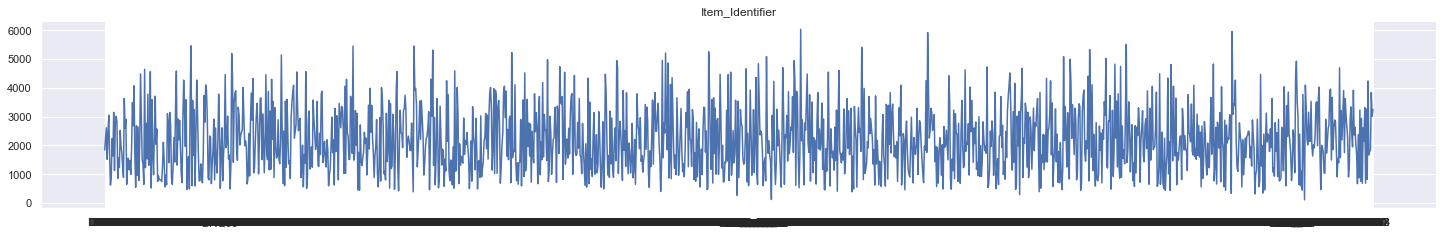

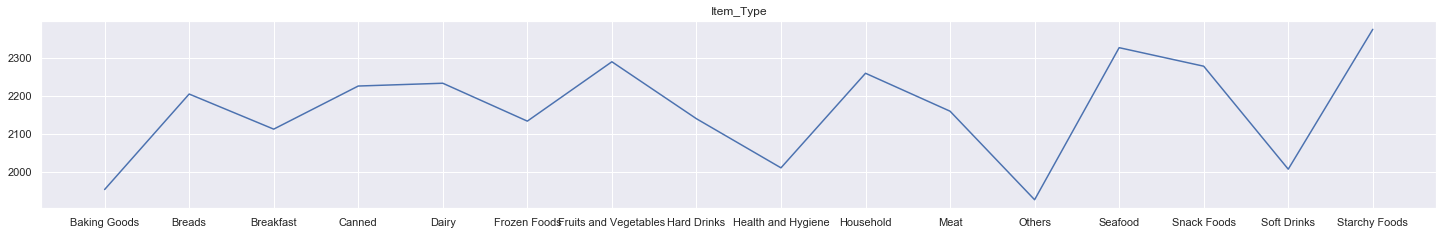

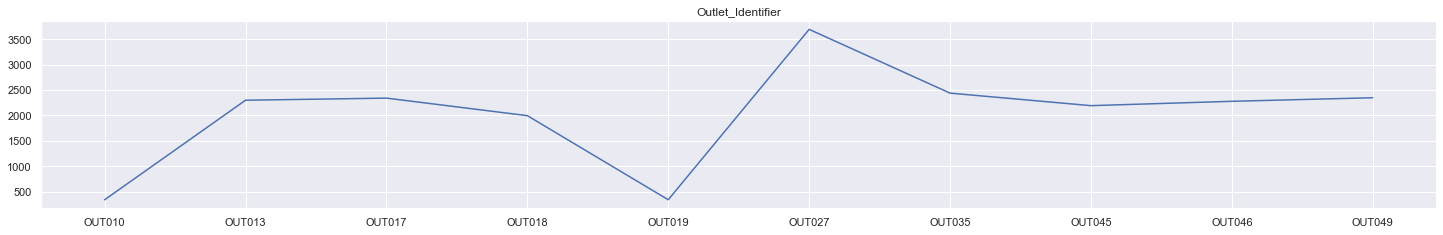

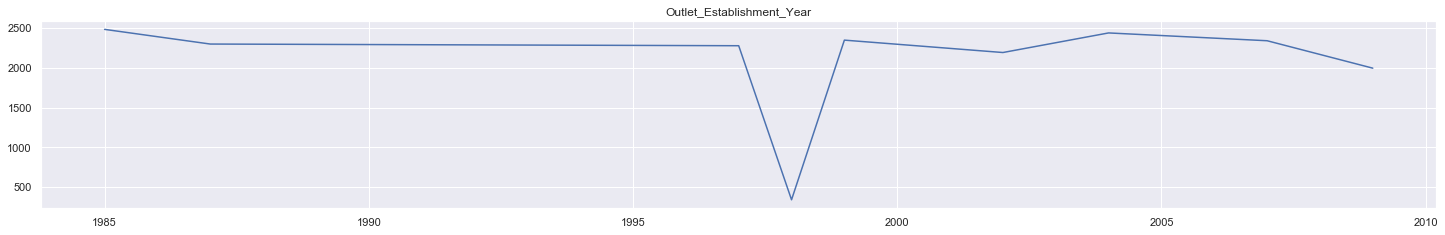

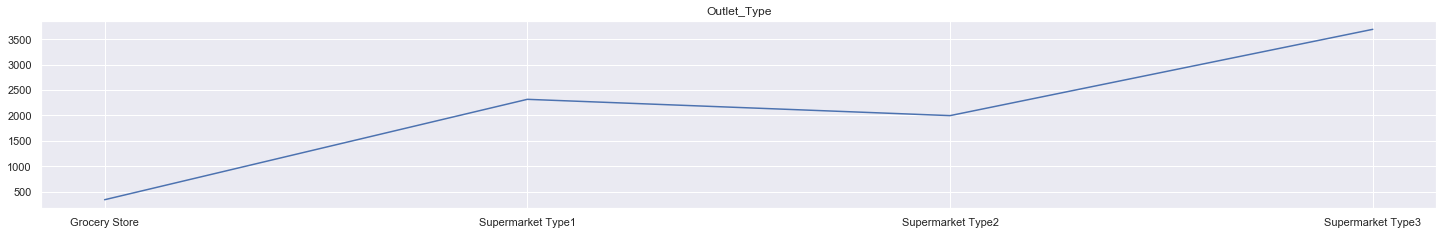

In [164]:
for i ,j in zip(column,range(1,len(column)+1)):
    plt.figure(figsize=(25,20))
    plt.subplot(len(column),1,j)
    plt.plot(data1.groupby(i).mean()['Item_Outlet_Sales'].index,data1.groupby(i).mean()['Item_Outlet_Sales'])
    plt.title(i)